# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span><ul class="toc-item"><li><span><a href="#locality_name" data-toc-modified-id="locality_name-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span><code>locality_name</code></a></span></li><li><span><a href="#is_apartment,-balcony,-parks_around3000-и-ponds_around3000" data-toc-modified-id="is_apartment,-balcony,-parks_around3000-и-ponds_around3000-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span><code>is_apartment</code>, <code>balcony</code>, <code>parks_around3000</code> и <code>ponds_around3000</code></a></span></li><li><span><a href="#days_exposition,-floors_total" data-toc-modified-id="days_exposition,-floors_total-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span><code>days_exposition</code>, <code>floors_total</code></a></span></li><li><span><a href="#ceiling_height,-living_area-и-kitchen_area" data-toc-modified-id="ceiling_height,-living_area-и-kitchen_area-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span><code>ceiling_height</code>, <code>living_area</code> и <code>kitchen_area</code></a></span></li><li><span><a href="#city_centers_nearest-и-airports_nearest" data-toc-modified-id="city_centers_nearest-и-airports_nearest-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span><code>city_centers_nearest</code> и <code>airports_nearest</code></a></span></li><li><span><a href="#parks_nearest-и-ponds_nearest" data-toc-modified-id="parks_nearest-и-ponds_nearest-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span><code>parks_nearest</code> и <code>ponds_nearest</code></a></span></li><li><span><a href="#Итог" data-toc-modified-id="Итог-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Итог</a></span></li></ul></li><li><span><a href="#Оптимизация-типов" data-toc-modified-id="Оптимизация-типов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Оптимизация типов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных,-чистка-выбросов" data-toc-modified-id="Изучение-данных,-чистка-выбросов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение данных, чистка выбросов</a></span><ul class="toc-item"><li><span><a href="#locality_name-–-название-населённого-пункта" data-toc-modified-id="locality_name-–-название-населённого-пункта-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span><code>locality_name</code> – название населённого пункта</a></span></li><li><span><a href="#last_price-–-цена-на-момент-снятия-с-публикации" data-toc-modified-id="last_price-–-цена-на-момент-снятия-с-публикации-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span><code>last_price</code> – цена на момент снятия с публикации</a></span></li><li><span><a href="#last_price_per_m2-–-цена-за-квадратный-метр" data-toc-modified-id="last_price_per_m2-–-цена-за-квадратный-метр-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span><code>last_price_per_m2</code> – цена за квадратный метр</a></span></li><li><span><a href="#first_day_exposition-–-дата-публикации" data-toc-modified-id="first_day_exposition-–-дата-публикации-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span><code>first_day_exposition</code> – дата публикации</a></span></li><li><span><a href="#days_exposition-–-продолжительность-размещения-объявления-в-днях" data-toc-modified-id="days_exposition-–-продолжительность-размещения-объявления-в-днях-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span><code>days_exposition</code> – продолжительность размещения объявления в днях</a></span></li><li><span><a href="#total_images-–-число-фотографий-квартиры-в-объявлении" data-toc-modified-id="total_images-–-число-фотографий-квартиры-в-объявлении-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span><code>total_images</code> – число фотографий квартиры в объявлении</a></span></li><li><span><a href="#floors_total,-floor-–-всего-этажей-в-доме-и-этаж-квартиры" data-toc-modified-id="floors_total,-floor-–-всего-этажей-в-доме-и-этаж-квартиры-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span><code>floors_total</code>, <code>floor</code> – всего этажей в доме и этаж квартиры</a></span></li><li><span><a href="#floor_type-–-тип-этажа-(первый-/-последний-/-другой)" data-toc-modified-id="floor_type-–-тип-этажа-(первый-/-последний-/-другой)-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span><code>floor_type</code> – тип этажа (первый / последний / другой)</a></span></li><li><span><a href="#is_apartment,-studio,-open_plan-–-апартаменты,-студия,-свободная-планировка-(булев-тип)" data-toc-modified-id="is_apartment,-studio,-open_plan-–-апартаменты,-студия,-свободная-планировка-(булев-тип)-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span><code>is_apartment</code>, <code>studio</code>, <code>open_plan</code> – апартаменты, студия, свободная планировка (булев тип)</a></span></li><li><span><a href="#rooms,-balcony-–-число-комнат-и-балконов" data-toc-modified-id="rooms,-balcony-–-число-комнат-и-балконов-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span><code>rooms</code>, <code>balcony</code> – число комнат и балконов</a></span></li><li><span><a href="#ceiling_height-–-высота-потолков-(м)" data-toc-modified-id="ceiling_height-–-высота-потолков-(м)-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span><code>ceiling_height</code> – высота потолков (м)</a></span></li><li><span><a href="#total_area,-living_area,-kitchen_area-–-площадь-квартиры-общая,-жилая-и-кухни-(м²)" data-toc-modified-id="total_area,-living_area,-kitchen_area-–-площадь-квартиры-общая,-жилая-и-кухни-(м²)-4.1.12"><span class="toc-item-num">4.1.12&nbsp;&nbsp;</span><code>total_area</code>, <code>living_area</code>, <code>kitchen_area</code> – площадь квартиры общая, жилая и кухни (м²)</a></span></li><li><span><a href="#living_area_percentage,-kitchen_area_percentage-–-доля-жилой-площади-и-кухни-от-общей-площади-(%)" data-toc-modified-id="living_area_percentage,-kitchen_area_percentage-–-доля-жилой-площади-и-кухни-от-общей-площади-(%)-4.1.13"><span class="toc-item-num">4.1.13&nbsp;&nbsp;</span><code>living_area_percentage</code>, <code>kitchen_area_percentage</code> – доля жилой площади и кухни от общей площади (%)</a></span></li><li><span><a href="#city_centers_nearest,-airports_nearest,-parks_nearest,-ponds_nearest-–-расстояние-до-центра-города,-ближайших-аэропорта,-парка-и-водоема-(м)" data-toc-modified-id="city_centers_nearest,-airports_nearest,-parks_nearest,-ponds_nearest-–-расстояние-до-центра-города,-ближайших-аэропорта,-парка-и-водоема-(м)-4.1.14"><span class="toc-item-num">4.1.14&nbsp;&nbsp;</span><code>city_centers_nearest</code>, <code>airports_nearest</code>, <code>parks_nearest</code>, <code>ponds_nearest</code> – расстояние до центра города, ближайших аэропорта, парка и водоема (м)</a></span></li><li><span><a href="#parks_around3000,-ponds_around3000-–-число-парков-и-водоемов-в-радиусе-3-км" data-toc-modified-id="parks_around3000,-ponds_around3000-–-число-парков-и-водоемов-в-радиусе-3-км-4.1.15"><span class="toc-item-num">4.1.15&nbsp;&nbsp;</span><code>parks_around3000</code>, <code>ponds_around3000</code> – число парков и водоемов в радиусе 3 км</a></span></li></ul></li><li><span><a href="#Анализ-взаимосвязей" data-toc-modified-id="Анализ-взаимосвязей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ взаимосвязей</a></span><ul class="toc-item"><li><span><a href="#last_price-vs.-total_area" data-toc-modified-id="last_price-vs.-total_area-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span><code>last_price</code> vs. <code>total_area</code></a></span></li><li><span><a href="#last_price-vs.-rooms" data-toc-modified-id="last_price-vs.-rooms-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span><code>last_price</code> vs. <code>rooms</code></a></span></li><li><span><a href="#last_price-vs.-city_centers_nearest" data-toc-modified-id="last_price-vs.-city_centers_nearest-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span><code>last_price</code> vs. <code>city_centers_nearest</code></a></span></li><li><span><a href="#last_price-vs.-floor_type" data-toc-modified-id="last_price-vs.-floor_type-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span><code>last_price</code> vs. <code>floor_type</code></a></span></li><li><span><a href="#last_price-vs.-first_day_exposition" data-toc-modified-id="last_price-vs.-first_day_exposition-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span><code>last_price</code> vs. <code>first_day_exposition</code></a></span></li></ul></li><li><span><a href="#Цена-квадратного-метра" data-toc-modified-id="Цена-квадратного-метра-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Цена квадратного метра</a></span></li><li><span><a href="#Где-центр?" data-toc-modified-id="Где-центр?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Где центр?</a></span></li><li><span><a href="#Центр-vs.-all" data-toc-modified-id="Центр-vs.-all-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Центр vs. all</a></span><ul class="toc-item"><li><span><a href="#last_price-–-цена-на-момент-снятия-с-публикации" data-toc-modified-id="last_price-–-цена-на-момент-снятия-с-публикации-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span><code>last_price</code> – цена на момент снятия с публикации</a></span></li><li><span><a href="#last_price_per_m2-–-цена-за-квадратный-метр" data-toc-modified-id="last_price_per_m2-–-цена-за-квадратный-метр-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span><code>last_price_per_m2</code> – цена за квадратный метр</a></span></li><li><span><a href="#rooms-–-число-комнат-и-балконов" data-toc-modified-id="rooms-–-число-комнат-и-балконов-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span><code>rooms</code> – число комнат и балконов</a></span></li><li><span><a href="#ceiling_height-–-высота-потолков-(м)" data-toc-modified-id="ceiling_height-–-высота-потолков-(м)-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span><code>ceiling_height</code> – высота потолков (м)</a></span></li><li><span><a href="#total_area-–-общая-площадь-квартиры-(м²)" data-toc-modified-id="total_area-–-общая-площадь-квартиры-(м²)-4.5.5"><span class="toc-item-num">4.5.5&nbsp;&nbsp;</span><code>total_area</code> – общая площадь квартиры (м²)</a></span></li><li><span><a href="#last_price-vs.-rooms" data-toc-modified-id="last_price-vs.-rooms-4.5.6"><span class="toc-item-num">4.5.6&nbsp;&nbsp;</span><code>last_price</code> vs. <code>rooms</code></a></span></li><li><span><a href="#last_price-vs.-city_centers_nearest" data-toc-modified-id="last_price-vs.-city_centers_nearest-4.5.7"><span class="toc-item-num">4.5.7&nbsp;&nbsp;</span><code>last_price</code> vs. <code>city_centers_nearest</code></a></span></li><li><span><a href="#last_price-vs.-floor_type" data-toc-modified-id="last_price-vs.-floor_type-4.5.8"><span class="toc-item-num">4.5.8&nbsp;&nbsp;</span><code>last_price</code> vs. <code>floor_type</code></a></span></li><li><span><a href="#last_price-vs.-first_day_exposition" data-toc-modified-id="last_price-vs.-first_day_exposition-4.5.9"><span class="toc-item-num">4.5.9&nbsp;&nbsp;</span><code>last_price</code> vs. <code>first_day_exposition</code></a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

Подключим необходимые модули и установим полезные умолчания.

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background'); # темный фон графиков
plt.rc('axes', grid=True); # линии сетки 
plt.rc('axes', axisbelow=True); # линии сетки позади графика

Считаем данные из файла и взглянем на первые строки.

In [131]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Переименуем столбец со смешанным регистром и более логично переупорядочим столбцы.

In [132]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
df = df[[
    'locality_name', 
    'last_price',  
    'first_day_exposition',
    'days_exposition',              
    'total_images',
    'floors_total', 
    'floor',
    'is_apartment', 
    'studio', 
    'open_plan', 
    'rooms', 
    'balcony',
    'ceiling_height', 
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'city_centers_nearest',
    'airports_nearest', 
    'parks_around3000', 
    'parks_nearest', 
    'ponds_around3000',
    'ponds_nearest'
]]

Посмотрим на типы данных и число ненулевых значений в столбцах.

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
locality_name           23650 non-null object
last_price              23699 non-null float64
first_day_exposition    23699 non-null object
days_exposition         20518 non-null float64
total_images            23699 non-null int64
floors_total            23613 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
rooms                   23699 non-null int64
balcony                 12180 non-null float64
ceiling_height          14504 non-null float64
total_area              23699 non-null float64
living_area             21796 non-null float64
kitchen_area            21421 non-null float64
city_centers_nearest    18180 non-null float64
airports_nearest        18157 non-null float64
parks_around3000        18181 non-null float64
parks_nearest 

Датасет состоит из 23699 строк и 22 столбцов. Во многих столбцах есть существенное число пропущенных значений. Типы данных у большинства столбцов избыточны. Предстоит долгая и изнурительная работа по предобработке и исследованию данных.

## Предобработка данных

### Заполнение пропусков

Посмотрим, в каких столбцах и сколько есть пропусков.

In [134]:
df.isna().agg(['sum','mean']).transpose()

,sum,mean
locality_name,49.0,0.002068
last_price,0.0,0.000000
first_day_exposition,0.0,0.000000
days_exposition,3181.0,0.134225
total_images,0.0,0.000000
floors_total,86.0,0.003629
floor,0.0,0.000000
is_apartment,20924.0,0.882906
studio,0.0,0.000000
open_plan,0.0,0.000000


#### `locality_name`

В столбце `locality_name` с названием населенного пункта пропущено всего 49 значений. Возможно, удастся восстановить пропуски по расстоянию до центра и аэропорта. Посмотрим, заполнены ли эти поля у объявлений с пропусками.

In [135]:
locality_na = df[df['locality_name'].isna()][['city_centers_nearest', 'airports_nearest']]
locality_na

,city_centers_nearest,airports_nearest
1097,4258.0,23478.0
2033,NaN,NaN
2603,17369.0,22041.0
2632,17369.0,22041.0
3574,8127.0,27419.0
4151,3902.0,25054.0
4189,3039.0,21774.0
4670,5382.0,26534.0
5343,9538.0,10556.0
5707,16788.0,21460.0


Почти у всех заполнены. Часто втречается сочетание расстояний (17369, 22041). Проверим, удастся ли восстановить населенный пункт у объявлений с таким сочетанием.

In [136]:
df.query("city_centers_nearest == 17369 and airports_nearest == 22041")['locality_name'].value_counts()

Санкт-Петербург    13
Name: locality_name, dtype: int64

Бинго! Однозначный ответ – Санкт-Петербург. Что ж, попробуем восстановить остальные пропуски. Сначала составим справочник `localities`: расстояния до центра и аэропорта → населенный пункт.

In [137]:
localities = (
      df.groupby(['locality_name', 'city_centers_nearest', 'airports_nearest']).count()
      .reset_index(level='locality_name')[['locality_name']]
)
localities.head()

,,locality_name
city_centers_nearest,airports_nearest,
51115.0,70016.0,Зеленогорск
52628.0,71529.0,Зеленогорск
52696.0,71597.0,Зеленогорск
52717.0,71618.0,Зеленогорск
52968.0,71869.0,Зеленогорск


Теперь приджойним справочник к срезу объявлений без населенного пункта.

In [138]:
locality_recovered = locality_na.join(localities, how='inner',
                                      on=['city_centers_nearest', 'airports_nearest'])[['locality_name']]
print(len(locality_recovered))
locality_recovered

18


,locality_name
2603,Санкт-Петербург
2632,Санкт-Петербург
6765,Санкт-Петербург
13223,Санкт-Петербург
14273,Санкт-Петербург
16499,Санкт-Петербург
19972,Санкт-Петербург
22933,Санкт-Петербург
4151,Санкт-Петербург
5707,Санкт-Петербург


Населенный пункт удалось восстановить лишь в 18 объявлениях из 49. И везде это Санкт-Петербург. Ну, тоже неплохо. Заполним, что есть, а остальные пропуски придется оставить пустыми.

In [139]:
df = df.fillna(locality_recovered)
df.loc[locality_recovered.index]

,locality_name,last_price,first_day_exposition,days_exposition,total_images,floors_total,floor,is_apartment,studio,open_plan,rooms,balcony,ceiling_height,total_area,living_area,kitchen_area,city_centers_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
2603,Санкт-Петербург,3351765.0,2015-09-20T00:00:00,276.0,20,24.0,3,NaN,False,False,1,0.0,NaN,42.7,15.60,10.70,17369.0,22041.0,0.0,NaN,1.0,374.0
2632,Санкт-Петербург,5130593.0,2015-10-11T00:00:00,256.0,2,24.0,21,NaN,False,False,2,0.0,NaN,62.4,33.10,8.20,17369.0,22041.0,0.0,NaN,1.0,374.0
6765,Санкт-Петербург,4895892.0,2015-03-12T00:00:00,468.0,20,24.0,3,NaN,False,False,2,0.0,NaN,60.7,31.90,12.20,17369.0,22041.0,0.0,NaN,1.0,374.0
13223,Санкт-Петербург,2919911.0,2015-03-12T00:00:00,470.0,1,24.0,2,NaN,False,False,1,0.0,2.75,29.4,21.10,NaN,17369.0,22041.0,0.0,NaN,1.0,374.0
14273,Санкт-Петербург,4422000.0,2016-03-23T00:00:00,90.0,2,23.0,14,NaN,False,False,2,0.0,2.75,60.0,32.00,11.90,17369.0,22041.0,0.0,NaN,1.0,374.0
16499,Санкт-Петербург,4995573.0,2016-06-17T00:00:00,4.0,2,24.0,14,NaN,False,False,2,0.0,NaN,56.9,29.20,10.90,17369.0,22041.0,0.0,NaN,1.0,374.0
19972,Санкт-Петербург,4361004.0,2015-09-20T00:00:00,278.0,20,24.0,21,NaN,False,False,2,0.0,NaN,62.4,33.10,8.20,17369.0,22041.0,0.0,NaN,1.0,374.0
22933,Санкт-Петербург,3176015.0,2015-04-22T00:00:00,427.0,20,23.0,22,NaN,False,False,1,0.0,NaN,33.3,15.40,9.00,17369.0,22041.0,0.0,NaN,1.0,374.0
4151,Санкт-Петербург,17600000.0,2014-12-09T00:00:00,869.0,17,8.0,7,NaN,False,False,2,0.0,3.00,89.5,39.62,13.38,3902.0,25054.0,1.0,485.0,3.0,722.0
5707,Санкт-Петербург,3700000.0,2016-04-29T00:00:00,49.0,7,24.0,23,NaN,False,False,1,0.0,NaN,30.0,20.00,NaN,16788.0,21460.0,0.0,NaN,1.0,170.0


#### `is_apartment`, `balcony`, `parks_around3000` и `ponds_around3000`

Логично предположить, что пропуск в столбце `is_apartment` означает, что объект не апартаменты. Значит можно заполнить эти пропуски значением `False`.

In [140]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Также логично, что пропуски в столбцах `balcony`, `parks_around3000` и `ponds_around3000` означают отсутствие балконов, парков и прудов в радиусе 3 км, соответственно. Т.е. эти пропуски можно заполнить нулями.

In [141]:
df[[
    'balcony',
    'parks_around3000',
    'ponds_around3000'
]] = df[[
    'balcony',
    'parks_around3000',
    'ponds_around3000'
]].fillna(0)

#### `days_exposition`, `floors_total`

Пропуски в столбце `days_exposition` могут объясняться тем, что соответствующие объявления еще не были закрыты на момент выгрузки датасета. Проверим гипотезу: посмотрим на распределение объявлений без `days_exposition` по годам публикации. Но сначала приведем столбец `first_day_exposition` к типу `datetime`.

In [142]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

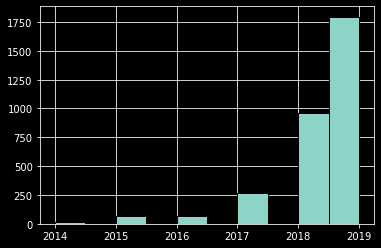

In [143]:
df[df['days_exposition'].isna()]['first_day_exposition'].dt.year.hist(edgecolor='k');

Похоже, что гипотеза подтверждается: подавляющая часть таких объявлений размещена в 2018–2019 годах. Можем заполнить пропуски нулями, чтобы привести потом этот столбец к целочисленному типу.

In [144]:
df['days_exposition'] = df['days_exposition'].fillna(0)

Пропуски в столбцах `floors_total` могут объясняться тем, что эта характеристика объекта не обязательна для заполнения при создании объявления. Заполним пропуски нулями, чтобы привести потом этот столбец к целочисленному типу.

In [145]:
df['floors_total'] = df['floors_total'].fillna(0)

#### `ceiling_height`, `living_area` и `kitchen_area`

Пропуски в столбцах `ceiling_height`, `living_area` и `kitchen_area`, скорее всего, тоже объясняются необязательностью заполнения. Заполнять их нулями не будем, потому что для значений в этих столбцах все равно нужен тип `float`.

#### `city_centers_nearest` и `airports_nearest`

Пропуски в столбцах `city_centers_nearest` и `airports_nearest` могли появиться из-за того, что не все пользователи, размещавшие объявления, соглашались обогатить их автоматическими картографическими данными. Пропуски можно заполнить медианным значением по соответствущему населенному пункту. Посмотрим сначала, сколько населенных пунктов имеют пропуски в этих столбцах.

In [146]:
print(len(df[df['city_centers_nearest'].isna()]['locality_name'].unique()))
print(len(df[df['airports_nearest'].isna()]['locality_name'].unique()))
print(len(df['locality_name'].unique()))

346
345
365


Почти все. Теперь посмотрим, для скольких из них найдется хотя бы одно непустое значение в этих столбцах, чтобы можно было рассчитать медиану.

In [147]:
(
    df.groupby('locality_name')[['city_centers_nearest', 'airports_nearest']]
    .agg(lambda x: x.count() / len(x)) # доля непустых значений
    .query("0 < city_centers_nearest < 1 or 0 < airports_nearest < 1") # только частично пустые 
)

,city_centers_nearest,airports_nearest
locality_name,,
Колпино,0.997041,0.997041
Красное Село,0.988764,0.988764
Кронштадт,0.989583,0.989583
Ломоносов,0.992481,0.992481
Пушкин,0.997290,1.000000
Санкт-Петербург,0.996124,0.994599
поселок Мурино,0.058824,0.058824
посёлок Шушары,0.990909,0.990909
посёлок Щеглово,0.043478,0.043478


Не густо: девять для `city_centers_nearest` и восемь для `airports_nearest`. Ну, заполним хотя бы по этим населенным пунктам.

In [148]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df.groupby('locality_name')['city_centers_nearest']
                                                               .transform('median')).round()
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest']
                                                       .transform('median')).round()
# округляем, чтобы потом привести эти столбцы к целочисленному типу

In [149]:
df[['city_centers_nearest', 'airports_nearest']].isna().agg(['sum','mean']).transpose()

,sum,mean
city_centers_nearest,5394.0,0.227605
airports_nearest,5394.0,0.227605


Всего немногим более сотни заполнений из пяти с половиной тысяч пропусков. Остальные пропуски заполним нулями, что потом привести эти столбцы к целочисленному типу.

In [150]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(0)
df['airports_nearest'] = df['airports_nearest'].fillna(0)

#### `parks_nearest` и `ponds_nearest`

Посмотрим, как связаны пропуски в столбцах `parks_nearest` и `ponds_nearest` с нулями в столбцах `parks_around3000` и `ponds_around3000`.

In [151]:
df[df['parks_around3000'] == 0]['parks_nearest'].value_counts(dropna=False)

NaN       15620
3190.0        2
3064.0        1
3013.0        1
Name: parks_nearest, dtype: int64

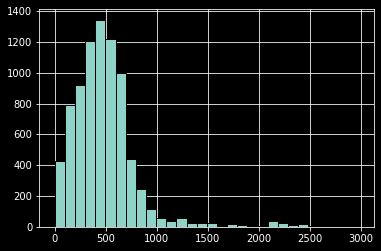

In [152]:
df[df['parks_around3000'] != 0]['parks_nearest'].hist(bins=30, edgecolor='k');

In [153]:
df[df['ponds_around3000'] == 0]['ponds_nearest'].value_counts(dropna=False)

NaN    14589
Name: ponds_nearest, dtype: int64

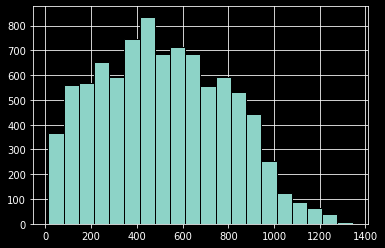

In [154]:
df[df['ponds_around3000'] != 0]['ponds_nearest'].hist(bins=20, edgecolor='k');

Все пропуски в этих столбцах вызваны просто отсутствием парков или прудов в радиусе 3 км. Заполним пропуски нулями, чтобы потом привести столбцы к целочисленному типу.

In [155]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

#### Итог

In [156]:
df.isna().agg(['sum','mean']).transpose()

,sum,mean
locality_name,31.0,0.001308
last_price,0.0,0.000000
first_day_exposition,0.0,0.000000
days_exposition,0.0,0.000000
total_images,0.0,0.000000
floors_total,0.0,0.000000
floor,0.0,0.000000
is_apartment,0.0,0.000000
studio,0.0,0.000000
open_plan,0.0,0.000000


Таким образом, явные пропуски остались лишь в столбцах `locality_name`, `ceiling_height`, `living_area` и `kitchen_area`. Пропуски в других столбцах теперь либо отсутствуют, либо неявно выражены нулями.

### Оптимизация типов

После заполнения пропусков можно оптимизировать типы данных в столбцах, т.е. привести столбцы к типам, которые позволят им занимать меньше памяти и быстрее обрабатываться, не снижая при этом необходимую для анализа точность самих данных.

Столбец `locality_name` содержит более 20 тысяч строковых значений, из которых уникальных лишь несколько сотен. Логично привести данные в нем к категориальному типу.

In [157]:
df['locality_name'] = df['locality_name'].astype('category')

Столбец `is_apartment` после заполнения пропусков автоматически стал `boolean`.

In [158]:
df['is_apartment'].dtype

dtype('bool')

Остальные числовые столбцы приведем к минимально возможному числовому типу: с плавающей точкой или целочисленному. Для этого, как бы просеивая через все более мелкие сита, сначала даункастим их в тип `float`, затем в `integer` и, наконец, в `unsigned`.

In [159]:
df_int_float = df.select_dtypes(include=['int', 'float']).apply(pd.to_numeric, 
                                                                downcast='float') 
df_int_float = df_int_float.apply(pd.to_numeric, downcast='integer') 
df_int_float = df_int_float.apply(pd.to_numeric, downcast='unsigned') 
df[df_int_float.columns] = df_int_float

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
locality_name           23668 non-null category
last_price              23699 non-null uint32
first_day_exposition    23699 non-null datetime64[ns]
days_exposition         23699 non-null uint16
total_images            23699 non-null uint8
floors_total            23699 non-null uint8
floor                   23699 non-null uint8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
rooms                   23699 non-null uint8
balcony                 23699 non-null uint8
ceiling_height          14504 non-null float32
total_area              23699 non-null float32
living_area             21796 non-null float32
kitchen_area            21421 non-null float32
city_centers_nearest    23699 non-null uint32
airports_nearest        23699 non-null uint32
parks_around3000        23699 non-null uint8
parks_nearest  

Объем занимаемой датафреймом памяти уменьшился в три с лишним раза.

## Расчёты и добавление результатов в таблицу

Добавим в датафрейм цену квадратного метра, а также год, месяц и день недели публикации объявления.

In [161]:
df['last_price_per_m2'] = pd.to_numeric(df['last_price'] // df['total_area'], downcast='unsigned')

In [162]:
df['first_day_exposition_year'] = df['first_day_exposition'].dt.year.astype('uint16')
df['first_day_exposition_month'] = df['first_day_exposition'].dt.month.astype('uint8')
df['first_day_exposition_weekday'] = df['first_day_exposition'].dt.weekday.astype('uint8') + 1 # чтобы 1 = пн

Добавим столбец с типом этажа: первый / последний / другой

In [163]:
df['floor_type'] = 'другой' # сначала всем ставим "другой"
df.loc[df['floor'] == 1, 'floor_type'] = 'первый' # потом проставляем "первый"
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний' # затем "последний"
df['floor_type'] = df['floor_type'].astype('category') # приводим к категориальному типу

Добавим столбцы с долей жилой площади и пложади кухни от общей.

In [164]:
df['living_area_percentage'] = (100 * df['living_area'].fillna(0) / df['total_area']).astype('uint8')
df['kitchen_area_percentage'] = (100 * df['kitchen_area'].fillna(0) / df['total_area']).astype('uint8')

Расположим новые столбцы в логическом порядке.

In [165]:
df = df[[
    'locality_name', 
    'last_price',  
    'last_price_per_m2',
    'first_day_exposition',
    'first_day_exposition_year', 
    'first_day_exposition_month',
    'first_day_exposition_weekday', 
    'days_exposition',              
    'total_images',
    'floors_total', 
    'floor',
    'floor_type', 
    'is_apartment', 
    'studio', 
    'open_plan', 
    'rooms', 
    'balcony',
    'ceiling_height', 
    'total_area', 
    'living_area', 
    'living_area_percentage',
    'kitchen_area', 
    'kitchen_area_percentage',
    'city_centers_nearest',
    'airports_nearest', 
    'parks_around3000', 
    'parks_nearest', 
    'ponds_around3000',
    'ponds_nearest'
]]

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
locality_name                   23668 non-null category
last_price                      23699 non-null uint32
last_price_per_m2               23699 non-null uint32
first_day_exposition            23699 non-null datetime64[ns]
first_day_exposition_year       23699 non-null uint16
first_day_exposition_month      23699 non-null uint8
first_day_exposition_weekday    23699 non-null uint8
days_exposition                 23699 non-null uint16
total_images                    23699 non-null uint8
floors_total                    23699 non-null uint8
floor                           23699 non-null uint8
floor_type                      23699 non-null category
is_apartment                    23699 non-null bool
studio                          23699 non-null bool
open_plan                       23699 non-null bool
rooms                           23699 non-null uint8
balcony                    

## Исследовательский анализ данных

### Изучение данных, чистка выбросов

Создадим функцию `describe_plus`, которая добавляет к выдаче метода `describe` число и долю пропусков.

In [167]:
def describe_plus(dataframe):
    display(
        pd.concat([
            dataframe.isna().agg(['sum', 'mean']).set_index(pd.Index(['na', 'na_rate'])),
            dataframe.describe()
        ])
    )

Определять границы выбросов для каждого столбца будем по нетронутым данным, т.е. данным, не очищенным от выбросов в уже проанализированных столбцах, чтобы чистка не влияла на выбор границ выбросов в очередном столбце. Для этого скопируем датафрейм и все изменения будем делать в копии.

In [168]:
df1 = df.copy()

#### `locality_name` – название населённого пункта

In [169]:
describe_plus(df[['locality_name']])

,locality_name
na,31
na_rate,0.00130807
count,23668
unique,364
top,Санкт-Петербург
freq,15739


In [170]:
df['locality_name'].value_counts().sort_values(ascending=False).head(10)

Санкт-Петербург      15739
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Две трети объявлений из Санкт-Перербурга. Остался 31 пропуск. Удалим объявления без населенного пункта. 

In [171]:
df1 = df1[df1['locality_name'].notna()]
df1.shape

(23668, 29)

#### `last_price` – цена на момент снятия с публикации

In [172]:
describe_plus(df[['last_price']])

,last_price
na,0.000000e+00
na_rate,0.000000e+00
count,2.369900e+04
mean,6.541549e+06
std,1.088701e+07
min,1.219000e+04
25%,3.400000e+06
50%,4.650000e+06
75%,6.800000e+06
max,7.630000e+08


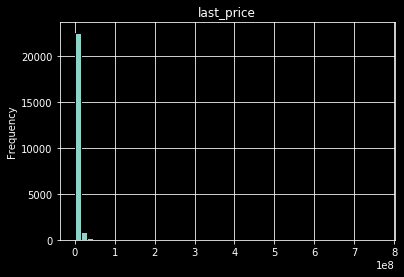

In [173]:
df['last_price'].plot.hist(bins=50, title='last_price', edgecolor='k');

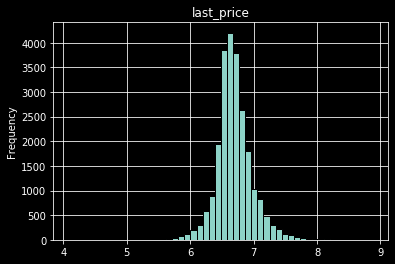

In [174]:
df['last_price'].apply(np.log10).plot.hist(bins=50, title='last_price', edgecolor='k');
# логарифмический масштаб по оси абсцисс, чтобы распределение было хорошо видно на всех масштабах значения столбца

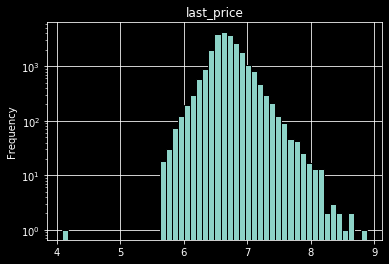

In [175]:
df['last_price'].apply(np.log10).plot.hist(bins=50, log=True, title='last_price', edgecolor='k');
# логарифмический масштаб еще и по оси ординат, чтобы были хорошо видны самые редкие значения

Медианная цена – 4 650 000. Распределение значений цены выглядит нормально за исключением выбросов в районе 10 000. Посмотрим, что это за цены.

In [176]:
df['last_price'].value_counts().sort_index()

12190        1
430000       2
440000       1
450000       4
470000       3
            ..
300000000    1
330000000    1
401300000    1
420000000    1
763000000    1
Name: last_price, Length: 2978, dtype: int64

Всего одно неадекватное значение. Посмотрим, что же это за объект.

In [177]:
df.query("last_price == 12190").transpose()

,8793
locality_name,Санкт-Петербург
last_price,12190
last_price_per_m2,111
first_day_exposition,2019-03-20 00:00:00
first_day_exposition_year,2019
first_day_exposition_month,3
first_day_exposition_weekday,3
days_exposition,8
total_images,7
floors_total,25


Стометровая двухкомнатная квартира не очень далеко от центра за 12 тысяч – заманчивое предложение. Возможно, имели в виду 12 тысяч тысяч – гадать не будем, а просто удалим выброс.

In [178]:
df1 = df1.drop(8793)
df1.shape

(23667, 29)

#### `last_price_per_m2` – цена за квадратный метр

In [179]:
describe_plus(df[['last_price_per_m2']])

,last_price_per_m2
na,0.000000e+00
na_rate,0.000000e+00
count,2.369900e+04
mean,9.942121e+04
std,5.030681e+04
min,1.110000e+02
25%,7.658500e+04
50%,9.500000e+04
75%,1.142560e+05
max,1.907500e+06


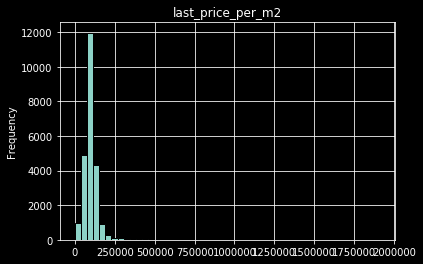

In [180]:
df['last_price_per_m2'].plot.hist(bins=50, title='last_price_per_m2', edgecolor='k');

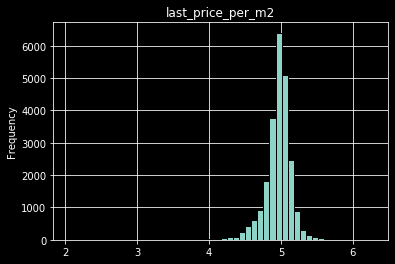

In [181]:
df['last_price_per_m2'].apply(np.log10).plot.hist(bins=50, title='last_price_per_m2', edgecolor='k');

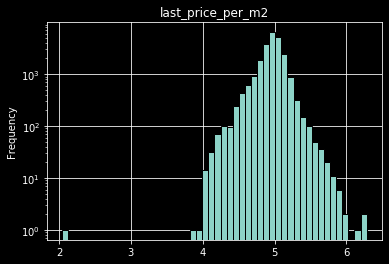

In [182]:
df['last_price_per_m2'].apply(np.log10).plot.hist(bins=50, log=True, title='last_price_per_m2', edgecolor='k');

Медианная цена за квадратный метр – 95 000. Распределение близко к нормальному. Удалим объекты с ценой ниже 10 000 и выше 1 000 000.

In [183]:
df1 = df1.query("1e4 <= last_price_per_m2 <= 1e6")
df1.shape

(23661, 29)

#### `first_day_exposition` – дата публикации

In [184]:
describe_plus(df[['first_day_exposition']])

,first_day_exposition
na,0
na_rate,0
count,23699
unique,1491
top,2018-02-01 00:00:00
freq,368
first,2014-11-27 00:00:00
last,2019-05-03 00:00:00


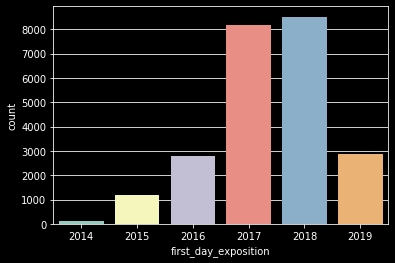

In [185]:
sns.countplot(df['first_day_exposition'].dt.year);

In [186]:
df['first_day_exposition'].value_counts().sort_index()

2014-11-27    19
2014-11-29     1
2014-12-04     2
2014-12-05     1
2014-12-08     8
              ..
2019-04-29    37
2019-04-30    27
2019-05-01    30
2019-05-02    11
2019-05-03    20
Name: first_day_exposition, Length: 1491, dtype: int64

Объявления из датасета были размещены с конца ноября 2014 по начало мая 2019. Большая часть объявлений приходится на 2017–2018 годы.

#### `days_exposition` – продолжительность размещения объявления в днях

In [187]:
describe_plus(df.query("days_exposition > 0")[['days_exposition']])
# берем ненулевые значения, т.е. завершившиеся объявления

,days_exposition
na,0.000000
na_rate,0.000000
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


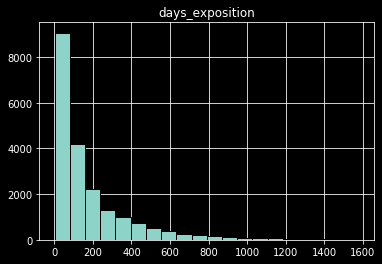

In [188]:
df.query("days_exposition > 0")[['days_exposition']].hist(bins=20, edgecolor='k');

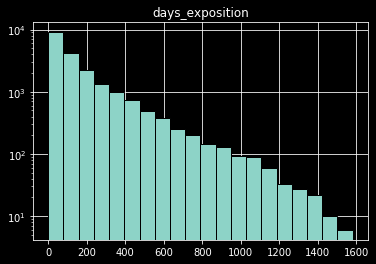

In [189]:
df.query("days_exposition > 0")[['days_exposition']].hist(bins=20, edgecolor='k', log=True);

Разброс значений длительности размещения внушительный: почти 4,5 года, т.е. весь покрываемый датасетом период. Медианное значение – три месяца – вполне адекватно. Посмотрим поближе на распределение вблизи ноля.

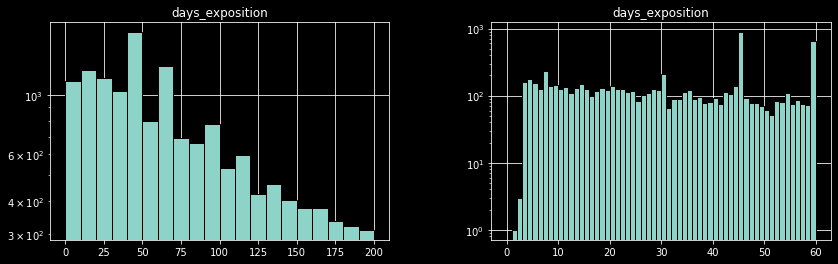

In [190]:
(fig, axes) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(14, 4)
df.query("days_exposition > 0")[['days_exposition']].hist(bins=20, range=(0, 200), edgecolor='k',
                                                          log=True, ax = axes[0]);
df.query("days_exposition > 0")[['days_exposition']].hist(bins=60, range=(0, 60), edgecolor='k', 
                                                          log=True, ax = axes[1]);

Выделяются частотой длительности в 45 и 60 дней (полтора и два месяца). Возможно, причина в автоматическом снятии каких-то типов объявлений, или в наличии такой опции. Также выпадают из общей картины распределения объявления, закрытые через один–два дня после публикации. 

In [191]:
df['days_exposition'].value_counts().sort_index().head(10)

0    3181
1       1
2       3
3     158
4     176
5     152
6     124
7     234
8     139
9     143
Name: days_exposition, dtype: int64

Удалим эти выбросы.

In [192]:
df1 = df1[~df1['days_exposition'].isin([1, 2])]
df1.shape

(23657, 29)

Посмотрим, связана ли длительность размещения с датой публикации. Для этого построим диаграмму рассеяния: длительность – число дней от публикации до максимальной даты в датасете.

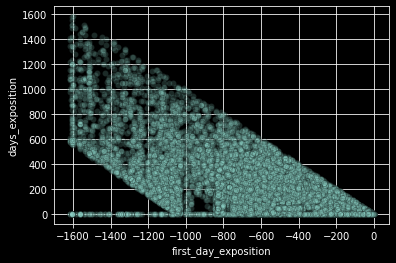

In [193]:
sns.scatterplot(y=df['days_exposition'], 
                x=(df['first_day_exposition'] 
                   - df['first_day_exposition'].max()).dt.days,
                edgecolor='k', alpha=.2);

Очень подозрительный пустой треугольник слева внизу: старые объявления как будто ограничены снизу по длительности размещения, причем это ограничение линейно снижается с ростом даты размещения. Похоже на ограничение даты снятия объявления. Проверим: постоим явную зависимость даты снятия объявления от даты публикации.

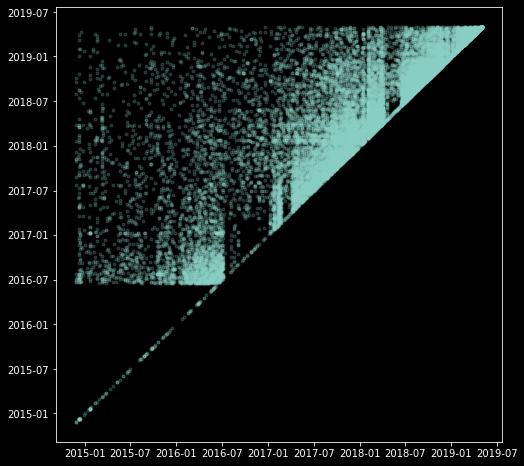

In [194]:
plt.figure(figsize=(8, 8));
plt.grid(False);
plt.plot(df['first_day_exposition'],
         df.apply(lambda row: row['first_day_exposition'] + pd.Timedelta(days=row['days_exposition']), axis=1),
         '.', alpha=.2);

Так и есть: в датасет не попали объявления с датой снятия с публикации раньше конца июня 2016. Хотел бы я знать, почему. Хорошо бы удалить все объявления, размещенные раньше конца июня 2016, чтобы выровнять распределение дат, но боюсь, это будет слишком радикальная чистка.

На этом графике также хорошо видны менее кардинальные пробелы в выгрузке: большой провал в числе краткосрочных объявлений в течение всей второй половины 2016, и два более коротких провала в 2017 и 2018. Что стало их причиной, остается только гадать.

#### `total_images` – число фотографий квартиры в объявлении

In [195]:
describe_plus(df[['total_images']])

,total_images
na,0.000000
na_rate,0.000000
count,23699.000000
mean,9.858475
std,5.682529
min,0.000000
25%,6.000000
50%,9.000000
75%,14.000000
max,50.000000


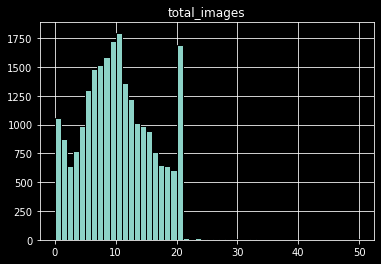

In [196]:
df[['total_images']].hist(bins=50, range=(0, 50), edgecolor='k');

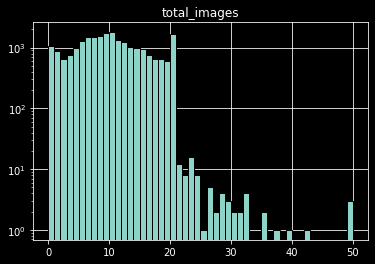

In [197]:
df[['total_images']].hist(bins=50, range=(0, 50), edgecolor='k', log=True);

Подавляющее большинство объявлений имеет не более 20 фотографий. Медиана – 9 фото. В значении 20 наблюдается повышенная частота, а потом ее резкий обвал. Возможно, это связано с ограничением в 20 фото, которое не распространялось, например, на VIP-аккаунты. Удалим выбросы: объявления с более чем 20 фото.

In [198]:
df1 = df1[df1['total_images'] <= 20]
df1.shape

(23582, 29)

#### `floors_total`, `floor` – всего этажей в доме и этаж квартиры

In [199]:
describe_plus(df[['floors_total', 'floor']])

,floors_total,floor
na,0.000000,0.000000
na_rate,0.000000,0.000000
count,23699.000000,23699.000000
mean,10.635090,5.892358
std,6.616396,4.885249
min,0.000000,1.000000
25%,5.000000,2.000000
50%,9.000000,4.000000
75%,16.000000,8.000000
max,60.000000,33.000000


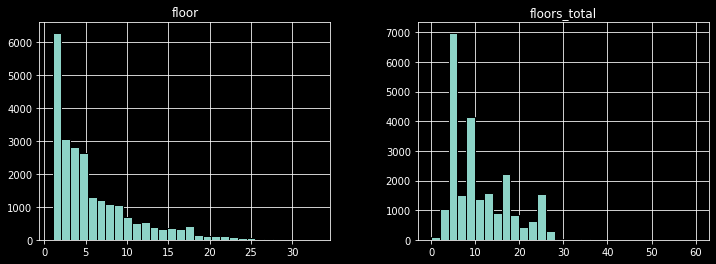

In [200]:
df[['floors_total', 'floor']].hist(bins=30, figsize=(12, 4), edgecolor='k');

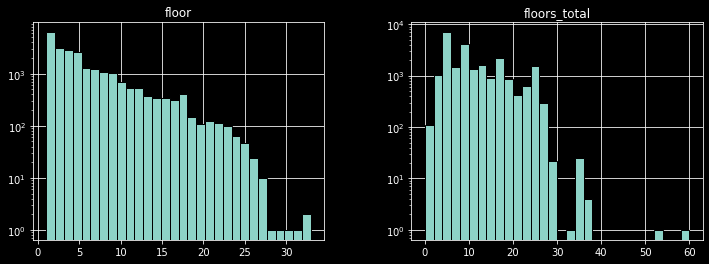

In [201]:
df[['floors_total', 'floor']].hist(bins=30, figsize=(12, 4), edgecolor='k', log=True);

Характерные пики частотности у 5-, 9-, 16- и 25-этажек. У этажности выше 25 подозрительно низкая частота. Посмотрим повнимательнее.

In [202]:
df['floor'].value_counts().sort_index().tail(10)

24    63
25    46
26    24
27    10
28     1
29     1
30     1
31     1
32     1
33     1
Name: floor, dtype: int64

In [203]:
df['floors_total'].value_counts().sort_index().tail(15)

22     286
23     352
24     469
25    1075
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       3
37       1
52       1
60       1
Name: floors_total, dtype: int64

Резкий обвал после 27-го этажа в обоих полях. Совпадение? Не думаю. О типовых 25-этажках я слышал (с чердаком может и все 27 будут), но вот 35-этажки – это что-то странное. Удалим от греха подальше. 

In [204]:
df1 = df1.query("floor <= 27 and floors_total <= 27")
df1.shape

(23528, 29)

Проверим еще, везде ли `floor` не больше `floors_total`.

In [205]:
df.query("floor > floors_total > 0")

,locality_name,last_price,last_price_per_m2,first_day_exposition,first_day_exposition_year,first_day_exposition_month,first_day_exposition_weekday,days_exposition,total_images,floors_total,floor,floor_type,is_apartment,studio,open_plan,rooms,balcony,ceiling_height,total_area,living_area,living_area_percentage,kitchen_area,kitchen_area_percentage,city_centers_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest


И то хорошо.

#### `floor_type` – тип этажа (первый / последний / другой)

In [206]:
df['floor_type'].value_counts()

другой       17446
последний     3361
первый        2892
Name: floor_type, dtype: int64

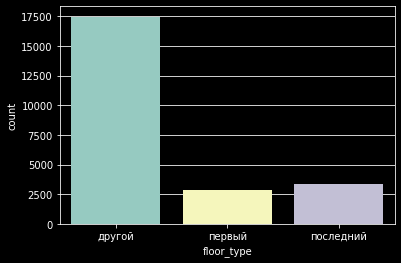

In [207]:
sns.countplot(df['floor_type']);

Здесь все в порядке, ничего удалять не будем.

#### `is_apartment`, `studio`, `open_plan` – апартаменты, студия, свободная планировка (булев тип)

In [208]:
df[['is_apartment', 'studio', 'open_plan']].agg(['sum', lambda x: x.count() - x.sum()]).set_index(pd.Index(['True', 'False']))

,is_apartment,studio,open_plan
True,50,149,67
False,23649,23550,23632


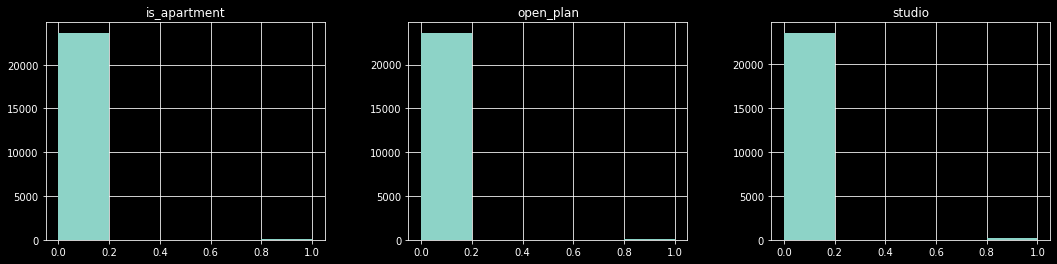

In [209]:
(fig, axes) = plt.subplots(nrows=1, ncols=3);
fig.set_size_inches(18, 4);
df[['is_apartment', 'studio', 'open_plan']].astype(float).hist(bins=5, ax=axes);

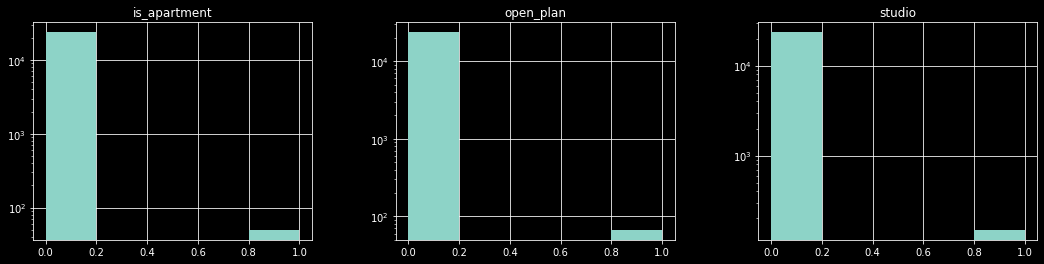

In [210]:
(fig, axes) = plt.subplots(nrows=1, ncols=3);
fig.set_size_inches(18, 4);
df[['is_apartment', 'studio', 'open_plan']].astype(float).hist(bins=5, log=True, ax=axes);

Доля апартаментов, студий и квартир со свободной планировкой ничтожно мала. Удалим их, чтобы не вносили искажения в тренды основного массива данных.

In [211]:
df1 = df1.query("not is_apartment and not studio and not open_plan")

Теперь можно удалить эти столбцы за ненадобностью.

In [212]:
df1 = df1.drop(['is_apartment', 'studio', 'open_plan'], axis=1)
df1.shape

(23265, 26)

#### `rooms`, `balcony` – число комнат и балконов

In [213]:
describe_plus(df[['rooms', 'balcony']])

,rooms,balcony
na,0.000000,0.000000
na_rate,0.000000,0.000000
count,23699.000000,23699.000000
mean,2.070636,0.591080
std,1.078405,0.959298
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,19.000000,5.000000


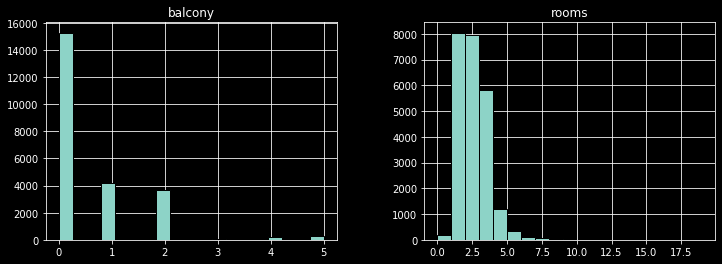

In [214]:
df[['rooms', 'balcony']].hist(bins=19,  figsize=(12, 4), edgecolor='k');

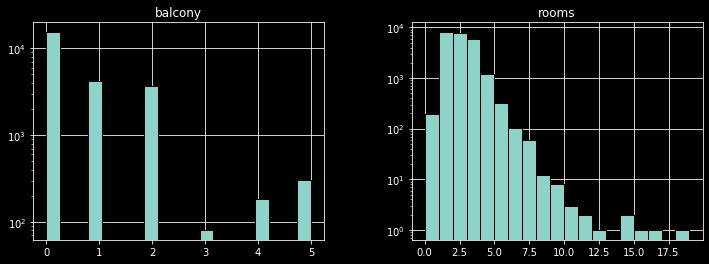

In [215]:
df[['rooms', 'balcony']].hist(bins=19,  figsize=(12, 4), edgecolor='k', log=True);

Доля объявлений с объектами с тремя и более балконами или шестью и более комнатами пренебрежимо мала. Удалим их по тем же причинам, что и студии с апартаментами.

In [216]:
df1 = df1.query("rooms <= 5 and balcony <= 2")
df1.shape

(22521, 26)

#### `ceiling_height` – высота потолков (м)

In [217]:
describe_plus(df[['ceiling_height']])

,ceiling_height
na,9195.000000
na_rate,0.387991
count,14504.000000
mean,2.771499
std,1.261056
min,1.000000
25%,2.520000
50%,2.650000
75%,2.800000
max,100.000000


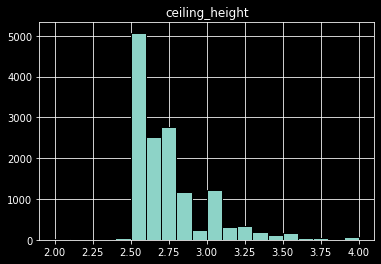

In [218]:
df[['ceiling_height']].hist(bins=20, range=(2, 4), edgecolor='k');

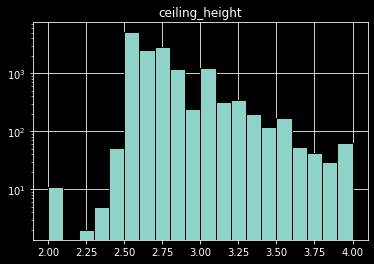

In [219]:
df[['ceiling_height']].hist(bins=20, range=(2, 4), edgecolor='k', log=True);

Квартиры с потолками ниже 2,5 м – это нонсенс. Удаляем выбросы.

In [220]:
df1 = df1[df1['ceiling_height'].isna() | (df1['ceiling_height'] >= 2.5)]
df1.shape

(22453, 26)

#### `total_area`, `living_area`, `kitchen_area` – площадь квартиры общая, жилая и кухни (м²)

In [221]:
describe_plus(df[['total_area', 'living_area', 'kitchen_area']])

,total_area,living_area,kitchen_area
na,0.000000,1903.000000,2278.000000
na_rate,0.000000,0.080299,0.096122
count,23699.000000,21796.000000,21421.000000
mean,60.348648,34.457855,10.569807
std,35.654083,22.030445,5.905438
min,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.900002,42.299999,12.000000
max,900.000000,409.700012,112.000000


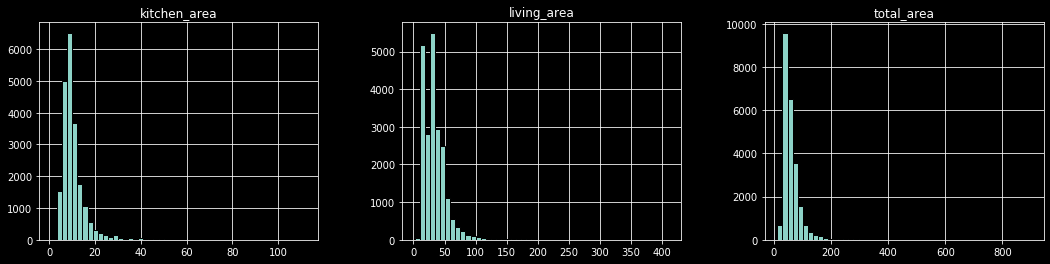

In [222]:
(fig, axes) = plt.subplots(nrows=1, ncols=3);
fig.set_size_inches(18, 4);
df[['total_area', 'living_area', 'kitchen_area']].hist(bins=50, edgecolor='k', ax=axes);

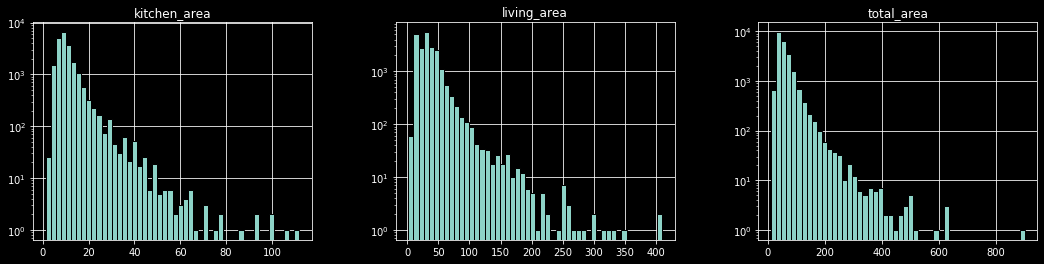

In [223]:
(fig, axes) = plt.subplots(nrows=1, ncols=3);
fig.set_size_inches(18, 4);
df[['total_area', 'living_area', 'kitchen_area']].hist(bins=50, edgecolor='k', log=True, ax=axes);

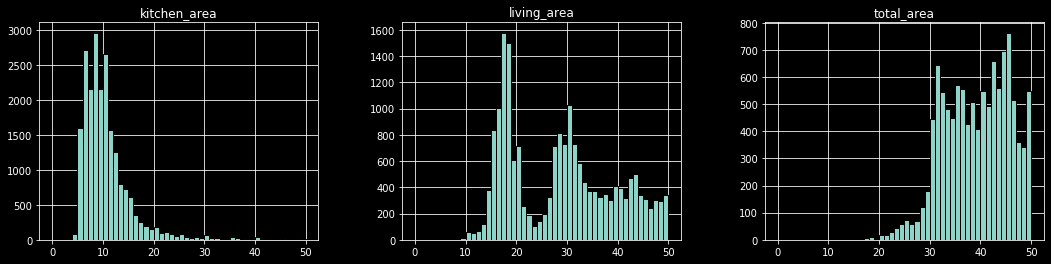

In [224]:
(fig, axes) = plt.subplots(nrows=1, ncols=3);
fig.set_size_inches(18, 4);
df[['total_area', 'living_area', 'kitchen_area']].hist(bins=50, range=(0, 50), ax=axes, edgecolor='k');

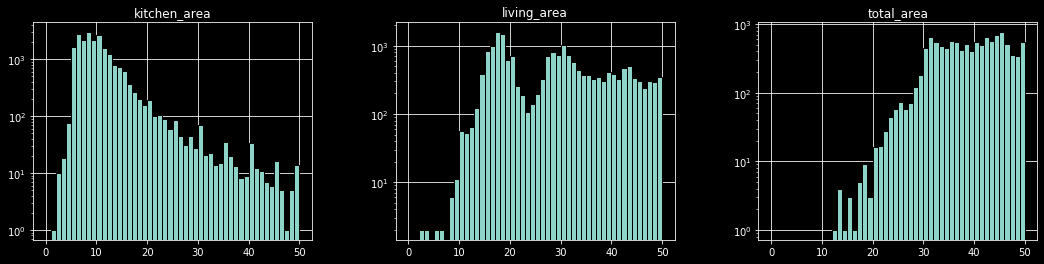

In [225]:
(fig, axes) = plt.subplots(nrows=1, ncols=3);
fig.set_size_inches(18, 4);
df[['total_area', 'living_area', 'kitchen_area']].hist(bins=50, range=(0, 50), ax=axes, edgecolor='k', log=True);

Определение *нижних* границ выбросов у столбцов с площадями особых затруднений не вызывает. Выбор *верхних* границ дается труднее. Но все же рискнем. 

In [226]:
df1 = df1.query("25 <= total_area <= 200")
df1 = df1[df1['living_area'].isna() | (10 <= df1['living_area']) & (df1['living_area'] <= 130)]
df1 = df1[df1['kitchen_area'].isna() | (5 <= df1['kitchen_area']) & (df1['kitchen_area'] <= 50)]
df1.shape

(22079, 26)

#### `living_area_percentage`, `kitchen_area_percentage` – доля жилой площади и кухни от общей площади (%)

In [227]:
describe_plus(df[['living_area_percentage', 'kitchen_area_percentage']])

,living_area_percentage,kitchen_area_percentage
na,0.000000,0.000000
na_rate,0.000000,0.000000
count,23699.000000,23699.000000
mean,51.507659,16.505253
std,18.268632,8.786921
min,0.000000,0.000000
25%,46.000000,12.000000
50%,55.000000,16.000000
75%,63.000000,22.000000
max,100.000000,78.000000


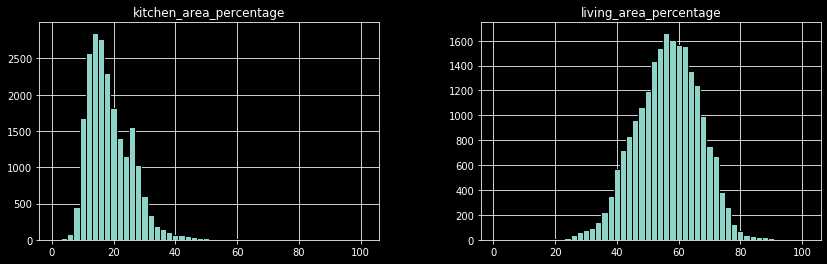

In [228]:
(fig, axes) = plt.subplots(nrows=1, ncols=2);
fig.set_size_inches(14, 4);
df[['living_area_percentage', 'kitchen_area_percentage']].hist(bins=50, range=(1, 101), edgecolor='k', ax=axes);

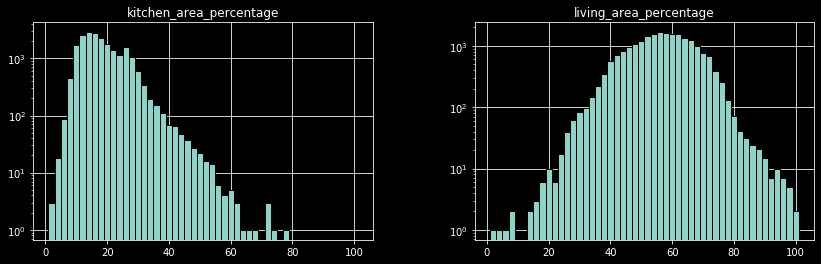

In [229]:
(fig, axes) = plt.subplots(nrows=1, ncols=2);
fig.set_size_inches(14, 4);
df[['living_area_percentage', 'kitchen_area_percentage']].hist(bins=50, range=(1, 101), edgecolor='k', ax=axes, log=True);

Удалим выбросы, ориентируясь на резкие спады частотности на гистограммах.

In [230]:
df1 = df1.query("living_area_percentage == 0 or 25 <= living_area_percentage <= 90")
df1 = df1.query("kitchen_area_percentage == 0 or 5 <= kitchen_area_percentage <= 55")
df1.shape

(22017, 26)

#### `city_centers_nearest`, `airports_nearest`, `parks_nearest`, `ponds_nearest` – расстояние до центра города, ближайших аэропорта, парка и водоема (м)

In [231]:
describe_plus(df[['city_centers_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest']])

,city_centers_nearest,airports_nearest,parks_nearest,ponds_nearest
na,0.000000,0.000000,0.000000,0.000000
na_rate,0.000000,0.000000,0.000000,0.000000
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,10992.488713,22294.411410,167.315499,199.114140
std,9647.785723,16447.874507,306.709997,305.188777
min,0.000000,0.000000,0.000000,0.000000
25%,2506.000000,10638.000000,0.000000,0.000000
50%,11348.000000,22041.000000,0.000000,0.000000
75%,15319.000000,34496.500000,301.000000,389.000000
max,65968.000000,84869.000000,3190.000000,1344.000000


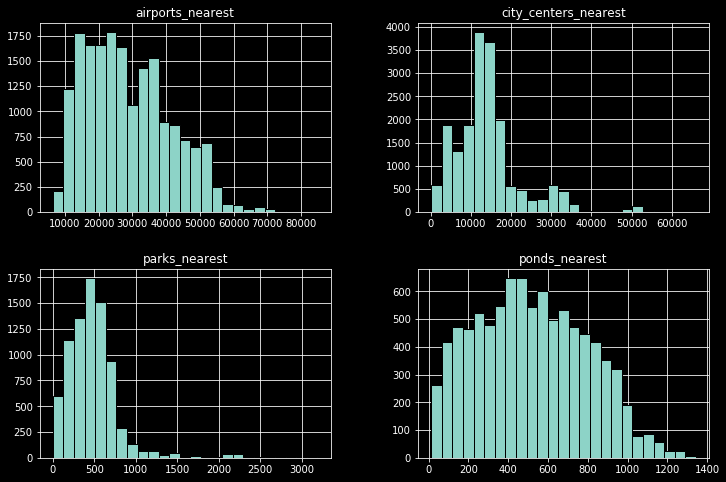

In [232]:
df[['city_centers_nearest', 
    'airports_nearest', 
    'parks_nearest', 
    'ponds_nearest']].replace(0, np.nan).hist(bins=25, figsize=(12, 8), edgecolor='k');

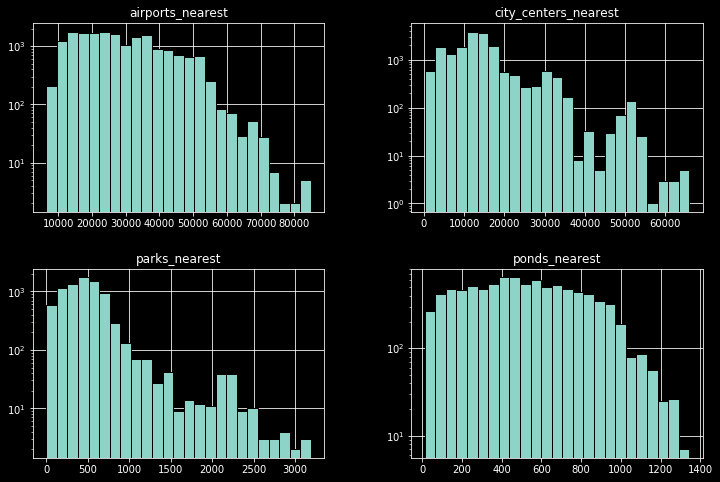

In [233]:
df[['city_centers_nearest', 
    'airports_nearest', 
    'parks_nearest', 
    'ponds_nearest']].replace(0, np.nan).hist(bins=25, figsize=(12, 8), edgecolor='k', log=True);

Отрежем «хвосты» справа, ориентируясь на гистограммы.

In [234]:
df1 = df1[df1['airports_nearest'].isna() | (df1['airports_nearest'] <= 70000)]
df1 = df1[df1['city_centers_nearest'].isna() | (df1['city_centers_nearest'] <= 55000)]
df1 = df1[df1['parks_nearest'].isna() | (df1['parks_nearest'] <= 3000)]
df1.shape

(21984, 26)

#### `parks_around3000`, `ponds_around3000` – число парков и водоемов в радиусе 3 км

In [235]:
describe_plus(df[['parks_around3000', 'ponds_around3000']])

,parks_around3000,ponds_around3000
na,0.000000,0.000000
na_rate,0.000000,0.000000
count,23699.000000,23699.000000
mean,0.469049,0.590911
std,0.748534,0.883999
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,3.000000


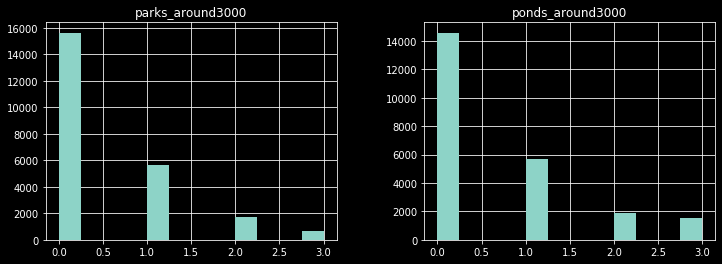

In [236]:
df[['parks_around3000', 'ponds_around3000']].hist(bins=12, figsize=(12, 4));

Похоже, что здесь все и так хорошо – ничего отрезать не нужно.

### Анализ взаимосвязей

Посмотрим, как после всех чисток выглядят статистика, гистограмма и функция распределения цены.

In [237]:
describe_plus(df[['last_price']])

,last_price
na,0.000000e+00
na_rate,0.000000e+00
count,2.369900e+04
mean,6.541549e+06
std,1.088701e+07
min,1.219000e+04
25%,3.400000e+06
50%,4.650000e+06
75%,6.800000e+06
max,7.630000e+08


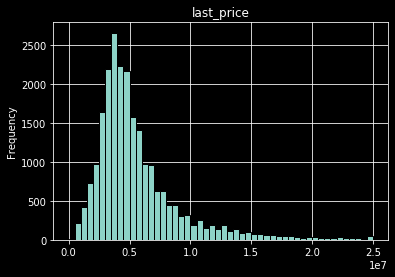

In [238]:
df['last_price'].plot.hist(bins=50, title='last_price', edgecolor='k', range=(0, 25e6));

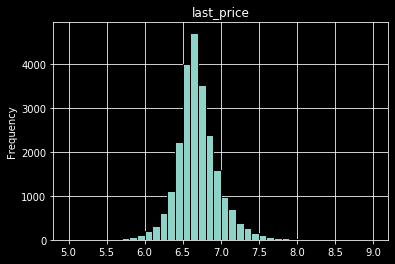

In [239]:
df['last_price'].apply(np.log10).plot.hist(bins=40, range=(5, 9), title='last_price', edgecolor='k');

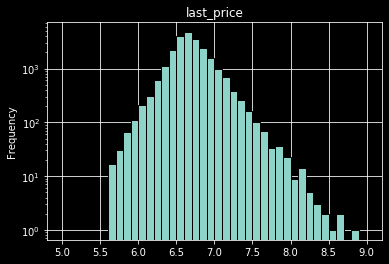

In [240]:
df['last_price'].apply(np.log10).plot.hist(bins=40, log=True, range=(5, 9), title='last_price', edgecolor='k');

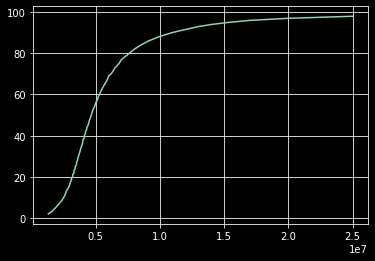

In [241]:
sns.lineplot(y=range(2, 99), x=np.percentile(df['last_price'], range(2, 99)));

Пожалуй, удалим сверхдорогие квартиры дороже 100 миллионов как слишком уникальные.

In [242]:
df1 = df1.query("last_price <= 100e6")
df1.shape

(21983, 26)

Теперь перезапишем датафрейм до чистки выбросов его копией без них.

In [243]:
df = df1

#### `last_price` vs. `total_area`

Посмотрим на функцию распределения общей площади, чтобы определить комфортную верхнюю границу для последующих графиков.

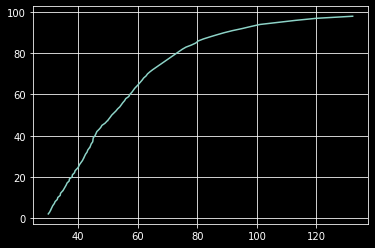

In [244]:
sns.lineplot(y=range(2, 99), x=np.percentile(df['total_area'], range(2, 99)));

Построим диаграмму рассеяния цены от площади.

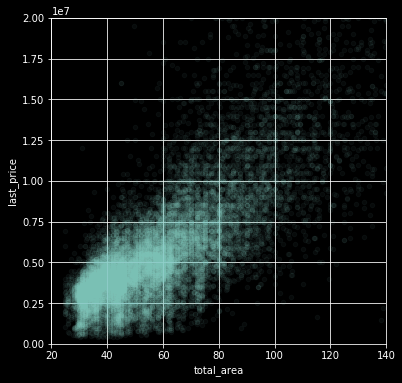

In [245]:
df.plot.scatter(y='last_price', x='total_area', xlim=(20, 140), ylim=(0, 20e6), alpha=.05, figsize=(6, 6));

Виден выраженный рост цены при увеличении общей площади, что неудивительно. Зависимость похожа на линейную. Построим такую же диаграмму, только в логарифмическом масштабе по обеим осям, чтобы повысить кучность больших значений и проверить гипотезу о линейности.

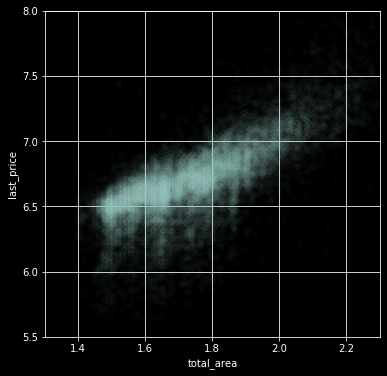

In [246]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(y=np.log10(df['last_price']), x=np.log10(df['total_area']), alpha=0.02);
ax.set(xlim=np.log10((20, 200)), ylim=(5.5, 8));

Линейность основного сгустка на этом графике выражена сильнее. Наклон тренда примерно равен единице, что подтверждает гипотезу о близкой к линейной зависимости цены от общей площади (при отличном от единицы наклоне зависимость была бы степенной). Посчитаем коэффициенты корреляции для обоих графиков.

In [247]:
print(df['last_price'].corr(df['total_area']))
print(np.log10(df['last_price']).corr(np.log10(df['total_area'])))

0.730197701825614
0.7286565063647783


Оба коэффициента довольно высокие, что, опять же, говорит в пользу линейной зависимости. На логарифмическом графике в области невысоких площадей хорошо заметен «шлейф» точек в сторону низких цен от основного сгустка. Это самые дешевые квартиры стоимостью меньше двух миллионов, выбивающиеся из основного тренда. Возможно, это квартиры из Ленинградской области, которые при той же площади стоят гораздо дешевле квартир из Петербурга.

#### `last_price` vs. `rooms`

Чтобы проанализировать зависимость цены от числа комнат, построим диаграмму «ящик с усами».

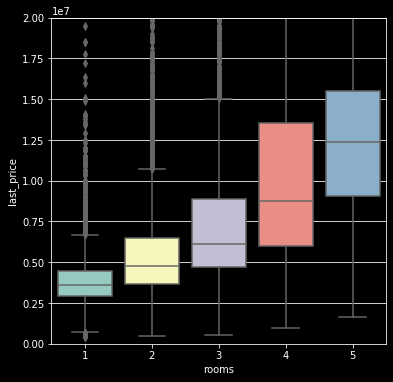

In [248]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(y=df['last_price'], x=df['rooms']);
ax.set(ylim=(0, 20e6));

С увеличением числа комнат заметно растет как медианная цена, так и ее разброс. Цена здесь растет не столько из-за увеличения номинального числа комнат, сколько из-за сопутствующего увеличения общей площади. Покажем это боксплотом общей площади от числа комнат.

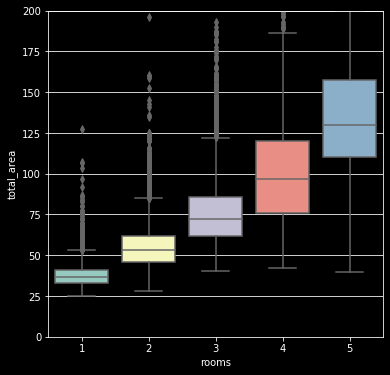

In [249]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(y=df['total_area'], x=df['rooms']);
ax.set(ylim=(0, 200));

Видно, что площадь теснее связана с числом комнат, чем цена: с ростом числа комнат межквартильный разброс площади растет не так быстро, как разброс цены.

#### `last_price` vs. `city_centers_nearest`

Посмотрим, как цена связана с расстоянием до центра.

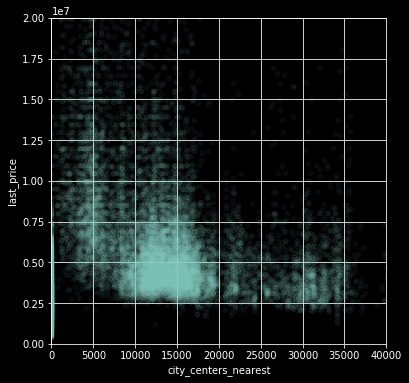

In [250]:
df.plot(kind='scatter', y='last_price', x='city_centers_nearest', 
        xlim=(0, 40000), ylim=(0, 20e6), alpha=.05, figsize=(6, 6));

Здесь связь уже не такая сильная, как с площадью: общий тренд на снижение цены с ростом расстояния просматривается, но разброс цены довольно большой, особенно недалеко от центра. На графике хорошо заметны три области повышенной концентрации точек: 3–7, 8–20 и 28–35 км от центра. Похоже на области «центр», «окраины – ближний пригород» и «дальний пригород».

Посчитаем коэффициент корреляции.

In [251]:
df.query("city_centers_nearest > 0")['last_price'].corr(df['city_centers_nearest'])

-0.3177044536322202

Корреляция слабая, потому что зависимость слабая и далека не линейной.

#### `last_price` vs. `floor_type`

Чтобы проанализировать зависимость цены от типа этажа, снова построим диаграмму «ящик с усами».

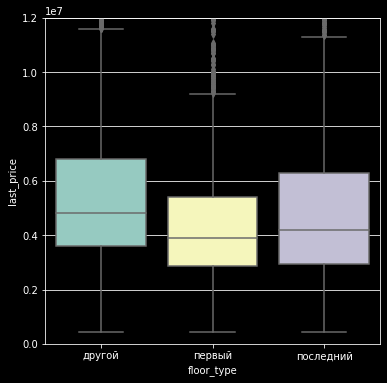

In [252]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(y=df['last_price'], x=df['floor_type']);
ax.set(ylim=(0, 12e6));

Зависимость слабая, но все же первый этаж несколько дешевле последнего, который, в свою очередь, немного дешевле любого другого. Разброс цен на первый этаж ниже, чем на последний и другие.

#### `last_price` vs. `first_day_exposition`

Наконец, посторим боксплоты, чтобы изучить зависимость цены от года, месяца и дня недели размещения объявления.

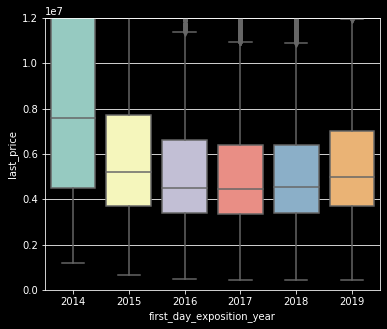

In [253]:
plt.figure(figsize=(6, 5))
ax = sns.boxplot(y=df['last_price'], x=df['first_day_exposition_year']);
ax.set(ylim=(0, 12e6));

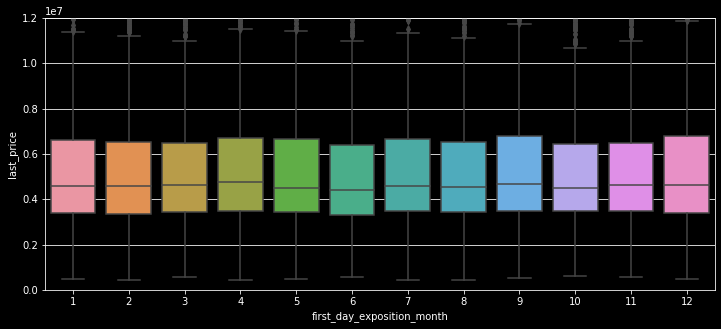

In [254]:
plt.figure(figsize=(12, 5))
ax = sns.boxplot(y=df['last_price'], x=df['first_day_exposition_month']);
ax.set(ylim=(0, 12e6));

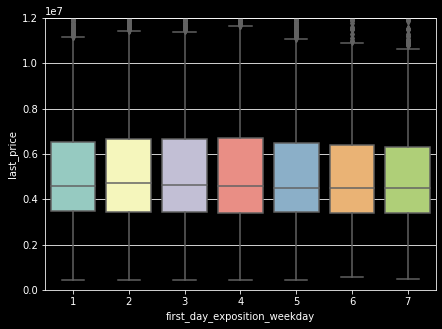

In [255]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(y=df['last_price'], x=df['first_day_exposition_weekday']);
ax.set(ylim=(0, 12e6));

Самыми высокими медианная цена и ее разброс были в 2014. Потом медианная цена снижалась до 2017 года, а в 2018 и 2019 подросла. Разброс цены снижался до 2018 года и немного вырос в 2019.

Сколько-нибудь выраженной зависимости медианной цены и ее разброса от месяца или дня недели не наблюдается. 

### Цена квадратного метра

Выберим 10 населённых пунктов с наибольшим числом объявлений и посчитаем медианную цену квадратного метра в них.

In [256]:
(
    df.groupby('locality_name')
    .agg(count=('last_price_per_m2', 'count'), median_price_per_m2=('last_price_per_m2', 'median'))
    .sort_values(by='count', ascending=False).head(10) # сортируем по числу объявлений и оставляем топ 10
    .sort_values(by='median_price_per_m2', ascending=False) # сортируем по цене
)

,count,median_price_per_m2
locality_name,,
Санкт-Петербург,14591,104000.0
Пушкин,345,99744.0
посёлок Парголово,312,91779.5
деревня Кудрово,263,91428.0
посёлок Мурино,460,83484.5
посёлок Шушары,420,76747.5
Колпино,322,74689.5
Гатчина,287,67796.0
Всеволожск,366,65789.0


Самая высокая стоимость жилья, ожидаемо, в Санкт-Петербурге – 104 тысячи за квадратный метр, самая низкая – в Выборге – 58 тысяч.

### Где центр?

Выясним, где заканчивается центр Санкт-Петербурга. Сначала создадим столбец с округленным расстоянием до центра в километрах.

In [257]:
df['km_from_center'] = pd.to_numeric(np.ceil(df['city_centers_nearest'] / 1000), downcast='unsigned')

Теперь построим график медианной цены квадратного метра от округленного расстояния до центра в километрах.

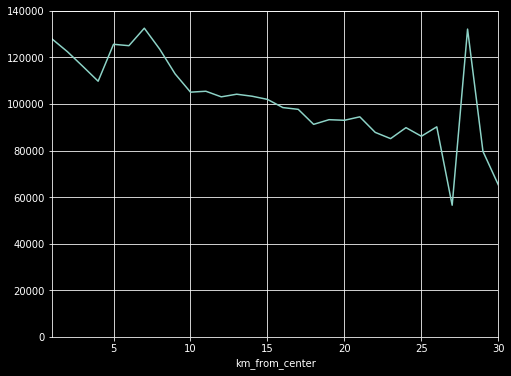

In [258]:
(
    df.query("locality_name == 'Санкт-Петербург'")
    .groupby('km_from_center')['last_price_per_m2']
    .median().sort_index()
    .plot(figsize=(8, 6), ylim=(0, 140000))
);

Если не считать скачок цены на 28-м километре (возможно, элитное поселение в Ленобласти), максимум приходится на седьмой километр. Между седьмым и 10-м километром цена снижается быстро, а после 10-го уже более полого. Примем за центр Санкт-Петербурга область с расстоянием до центра города не более семи километров. Сохраним все предложения из центра в отдельный датафрейм.

In [259]:
dfc = df.query("city_centers_nearest > 0 and 1 <= km_from_center <= 7")
len(dfc)

2913

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Удачное выделение центра

### Центр vs. all

Сравним распределения некоторых показателей среди квартир из центра и всех квартир из исходного датасета.

#### `last_price` – цена на момент снятия с публикации

In [518]:
describe_plus(dfc[['last_price']])

,last_price
na,0.000000e+00
na_rate,0.000000e+00
count,2.913000e+03
mean,1.152138e+07
std,9.119609e+06
min,2.100000e+06
25%,6.615000e+06
50%,8.840000e+06
75%,1.280000e+07
max,9.800000e+07


In [519]:
describe_plus(df[['last_price']])

,last_price
na,0.000000e+00
na_rate,0.000000e+00
count,2.198300e+04
mean,5.871085e+06
std,5.100836e+06
min,4.300000e+05
25%,3.440000e+06
50%,4.600000e+06
75%,6.580000e+06
max,9.800000e+07


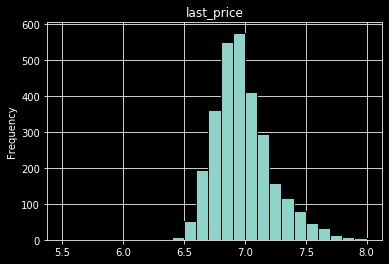

In [520]:
dfc['last_price'].apply(np.log10).plot.hist(bins=25, title='last_price', edgecolor='k', range=(5.5, 8));

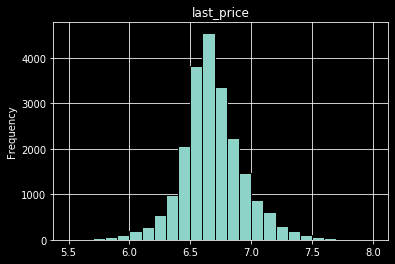

In [521]:
df['last_price'].apply(np.log10).plot.hist(bins=25, title='last_price', edgecolor='k', range=(5.5, 8));

Медианная цена квартир в центре – 8,8 миллиона – почти вдвое выше медианной цены по всему датасету. Распределение смещено в область б<i>о</i>льших цен, в отличие от симметричного (в логарифмическом масштабе) распределения во всем датасете.

#### `last_price_per_m2` – цена за квадратный метр

In [522]:
describe_plus(dfc[['last_price_per_m2']])

,last_price_per_m2
na,0.000000
na_rate,0.000000
count,2913.000000
mean,137320.624785
std,65007.960258
min,15861.000000
25%,99403.000000
50%,121580.000000
75%,152663.000000
max,848484.000000


In [523]:
describe_plus(df[['last_price_per_m2']])

,last_price_per_m2
na,0.000000
na_rate,0.000000
count,21983.000000
mean,97500.910886
std,41339.032204
min,10185.000000
25%,76190.000000
50%,94444.000000
75%,113234.000000
max,848484.000000


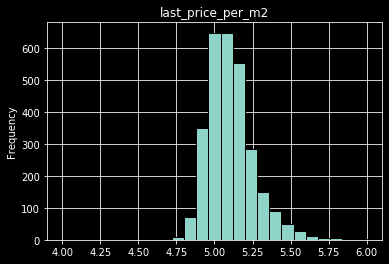

In [524]:
dfc['last_price_per_m2'].apply(np.log10).plot.hist(bins=25, title='last_price_per_m2', edgecolor='k', range=(4, 6));

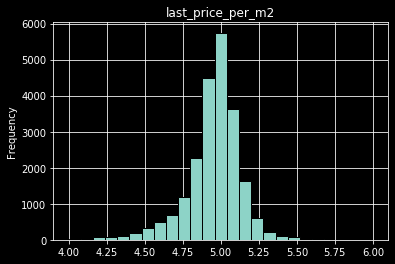

In [525]:
df['last_price_per_m2'].apply(np.log10).plot.hist(bins=25, title='last_price_per_m2', edgecolor='k', range=(4, 6));

Медианная цена за квадратный метр в центре – 122 тысячи – на треть больше, чем медиана по всему датасету. Распределение смещено вправо, в отличие от смещенного влево распределения во всем датасете.

#### `rooms` – число комнат и балконов

In [526]:
dfc.groupby('rooms')['rooms'].count() / len(dfc) * 100

rooms
1    15.070374
2    31.891521
3    32.818400
4    14.727085
5     5.492619
Name: rooms, dtype: float64

In [527]:
df.groupby('rooms')['rooms'].count() / len(df) * 100

rooms
1    35.045262
2    34.481190
3    24.532593
4     4.831006
5     1.109949
Name: rooms, dtype: float64

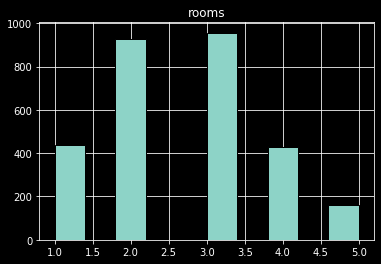

In [528]:
dfc[['rooms']].hist(bins=10, edgecolor='k');

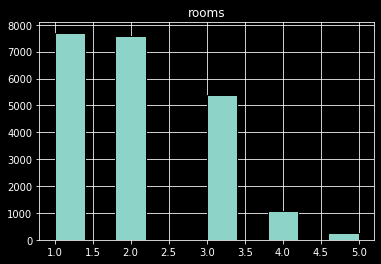

In [529]:
df[['rooms']].hist(bins=10, edgecolor='k');

В центре преобладают двух- и трехкомнатные квартиры, в отличие от одно- и двухкомнатных во всем датасете.

#### `ceiling_height` – высота потолков (м)

In [530]:
describe_plus(dfc[['ceiling_height']])

,ceiling_height
na,1016.000000
na_rate,0.348781
count,1897.000000
mean,3.093179
std,0.648232
min,2.500000
25%,2.840000
50%,3.000000
75%,3.250000
max,27.000000


In [531]:
describe_plus(df[['ceiling_height']])

,ceiling_height
na,8588.000000
na_rate,0.390666
count,13395.000000
mean,2.747045
std,0.864798
min,2.500000
25%,2.500000
50%,2.650000
75%,2.800000
max,32.000000


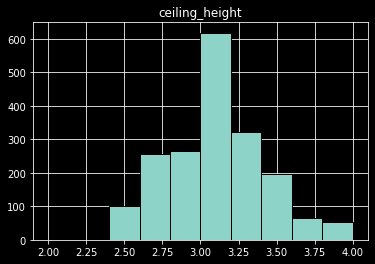

In [532]:
dfc[['ceiling_height']].hist(bins=10, range=(2, 4), edgecolor='k');

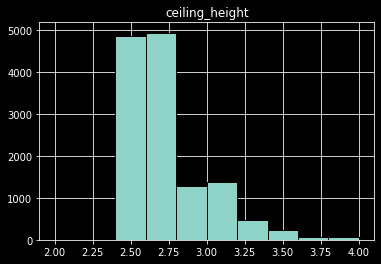

In [533]:
df[['ceiling_height']].hist(bins=10, range=(2, 4), edgecolor='k');

В центре преобладают квартиры с потолками около трех метров, тогда как во всем датасете больше квартир с высотой 2,5–2,7 м.

#### `total_area` – общая площадь квартиры (м²)

In [534]:
describe_plus(dfc[['total_area']])

,total_area
na,0.000000
na_rate,0.000000
count,2913.000000
mean,82.030426
std,33.952812
min,25.000000
25%,56.200001
50%,75.900002
75%,101.000000
max,200.000000


In [535]:
describe_plus(df[['total_area']])

,total_area
na,0.000000
na_rate,0.000000
count,21983.000000
mean,57.607754
std,25.045502
min,25.000000
25%,40.000000
50%,51.299999
75%,68.000000
max,200.000000


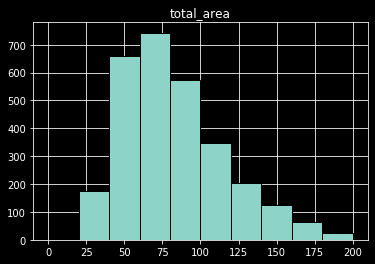

In [536]:
dfc[['total_area']].hist(bins=10, edgecolor='k', range=(0, 200));

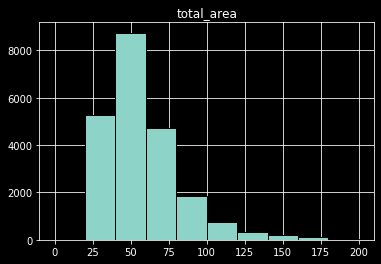

In [537]:
df[['total_area']].hist(bins=10, edgecolor='k', range=(0, 200));

В центре медианная площадь квартиры в полтора выше, чем медиана по всему датасету.

Теперь сравним влияние разных факторов на стоимость квартир из центра и стоимость всех квартир из датасета.

#### `last_price` vs. `rooms`

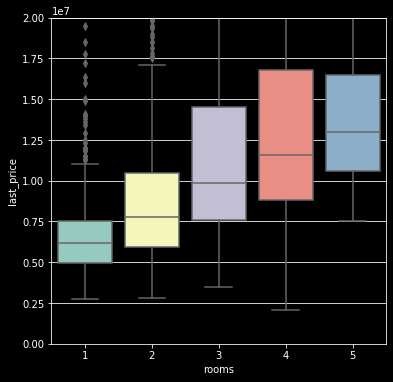

In [538]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(y=dfc['last_price'], x=dfc['rooms']);
ax.set(ylim=(0, 20e6));

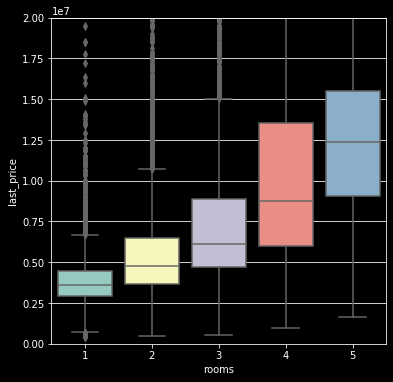

In [539]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(y=df['last_price'], x=df['rooms']);
ax.set(ylim=(0, 20e6));

Стоимость квартир в центре так же сильно растет с ростом числа комнат, как и стоимость всех квартир. По сравнению со всеми квартирами квартиры в центре с тем же числом комнат дороже, а разброс их стоимости больше для одно-, двух- и трехкомнатных квартир.

#### `last_price` vs. `city_centers_nearest`

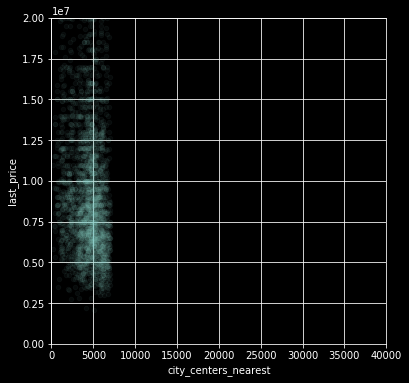

In [540]:
dfc.plot(kind='scatter', y='last_price', x='city_centers_nearest', 
         xlim=(0, 40000), ylim=(0, 20e6), alpha=.05, figsize=(6, 6));

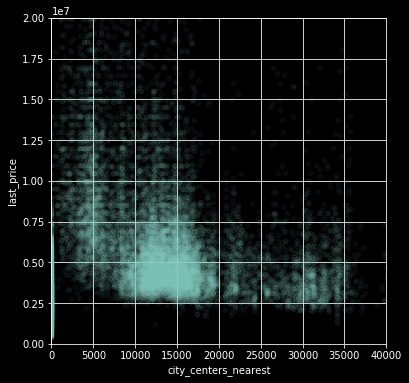

In [541]:
df.plot(kind='scatter', y='last_price', x='city_centers_nearest', 
        xlim=(0, 40000), ylim=(0, 20e6), alpha=.05, figsize=(6, 6));

In [260]:
print(df.query("city_centers_nearest > 0")['last_price'].corr(df['city_centers_nearest']))
print(dfc.query("city_centers_nearest > 0")['last_price'].corr(dfc['city_centers_nearest']))

-0.3177044536322202
0.004456770063776221


Зависимость стоимости от расстояния до центра у квартир из центра отсутствует, в отличие от слабой отрицательной зависимости у всех квартир.

#### `last_price` vs. `floor_type`

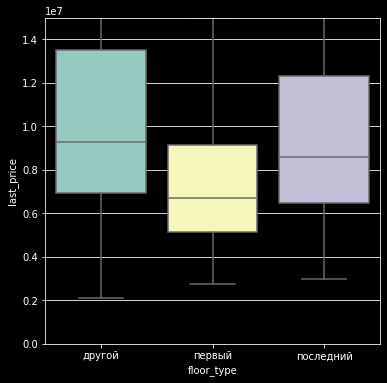

In [543]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(y=dfc['last_price'], x=dfc['floor_type']);
ax.set(ylim=(0, 15e6));

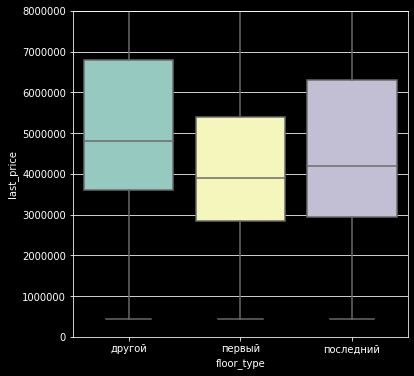

In [544]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(y=df['last_price'], x=df['floor_type']);
ax.set(ylim=(0, 8e6));

Квартиры в центре имеют несколько более выраженную пониженную стоимость первого этажа, чем квартиры из всего датасета, и меньший разброс цен на первый этаж.

#### `last_price` vs. `first_day_exposition`

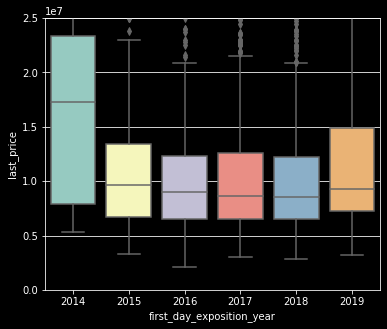

In [545]:
plt.figure(figsize=(6, 5))
ax = sns.boxplot(y=dfc['last_price'], x=dfc['first_day_exposition_year']);
ax.set(ylim=(0, 25e6));

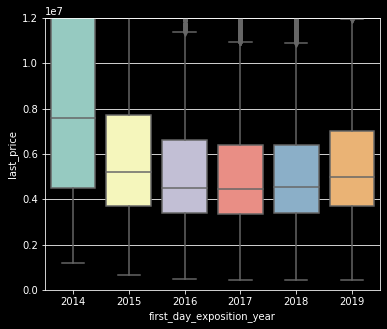

In [546]:
plt.figure(figsize=(6, 5))
ax = sns.boxplot(y=df['last_price'], x=df['first_day_exposition_year']);
ax.set(ylim=(0, 12e6));

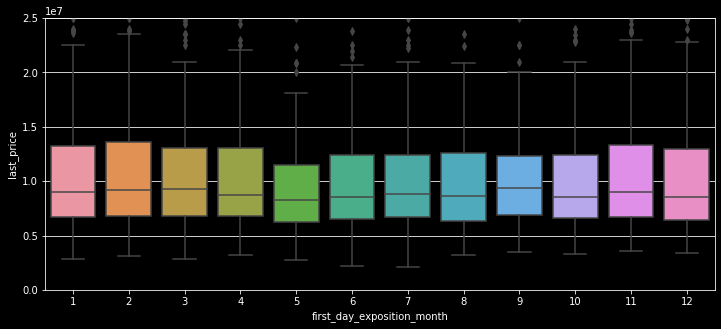

In [547]:
plt.figure(figsize=(12, 5))
ax = sns.boxplot(y=dfc['last_price'], x=dfc['first_day_exposition_month']);
ax.set(ylim=(0, 25e6));

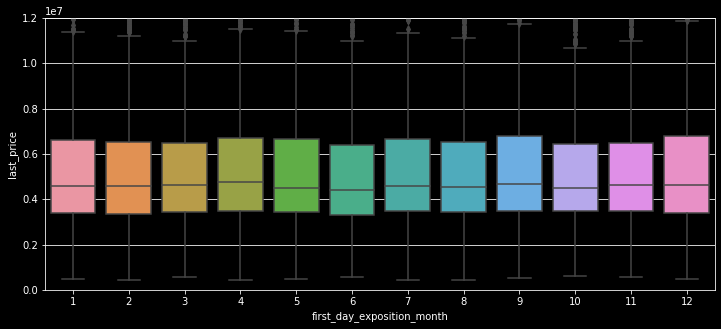

In [548]:
plt.figure(figsize=(12, 5))
ax = sns.boxplot(y=df['last_price'], x=df['first_day_exposition_month']);
ax.set(ylim=(0, 12e6));

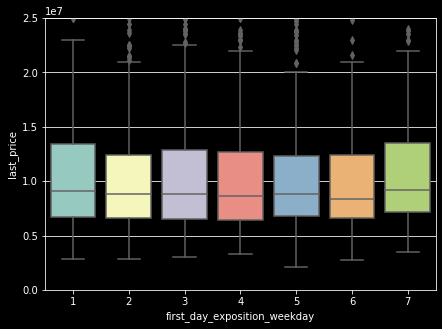

In [549]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(y=dfc['last_price'], x=dfc['first_day_exposition_weekday']);
ax.set(ylim=(0, 25e6));

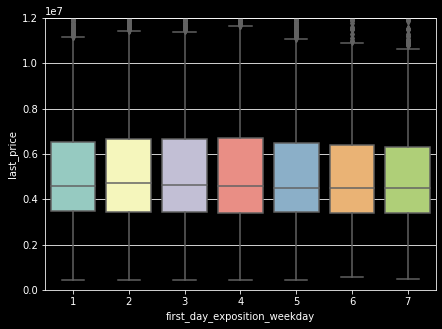

In [550]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(y=df['last_price'], x=df['first_day_exposition_weekday']);
ax.set(ylim=(0, 12e6));

Годовая динамика цен квартир из центра практически не отличается от таковой для квартир из всего датасета.

Сколько-нибудь выраженной зависимости медианной цены и ее разброса от месяца или дня недели не наблюдается так же, как и для всех квартир. 

## Общий вывод

- Стоимость квартиры сильно зависит от общей площади и числа комнат: чем больше площадь и число комнат, тем дороже квартира
- Стоимость квартиры слабо зависит от расстояния до центра: в целом, стоимость снижается при удалении от центра, но разброс значений очень большой, особенно в центре города
- Стоимость квартиры слабо зависит от типа этажа: первый этаж стоит несколько дешевле, чем последний, который, в свою очередь, несколько дешевле любого другого, но разброс значений довольно большой
- Заметны не очень выраженные колебания цен от года к году и отсутствие зависимости стоимости от месяца и дня недели
- Центральной частью города можно условно считать область, где расстояние до центра не более семи километров
- Квартиры в центре по сравнению с квартирами во всей базе:
    - почти вдвое дороже по медианной стоимости (8,8 против 4,6 млн)
    - на треть дороже по медианной цене за квадратный метр (122 против 95 тыс.)
    - в основном 2- и 3-комнатные (65%) против 1- и 2-комнатных (70%)
    - с 3-метровыми потолками против 2,65-метровых (медиана)
    - имеют в полтора раза большую медианную площадь (76 против 51 кв. м)
    - имеют иной характер зависимости стоимости от расстояния до центра: зависимость отсутствует
    - имеют тот же характер зависимости стоимости от числа комнат (сильная положительная), типа этажа (первый немного дешевле), года (та же динамика), месяца (отсутствует) и дня недели (отсутствует)